### Phase 4 is about using ML methods and compare with Binary Logistic Regression 

1. Create data partition into train and test data sets ( 80/20) (already done for Logistic Regression)
1. Apply Naïve Bayes Method on train data with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables.   
1. Obtain ROC curve and AUC for train data
1. Obtain Confusion Matrix for train data
1. Obtain ROC curve and AUC for test data
1. Obtain Confusion Matrix for test data
1. Repeat steps 2 to 6 for Decision Tree
1. Repeat steps 2 to 6 for Random Forest Method 
1. Compare AUC for test data in case of 4/5 methods and finalize the method

In [13]:
# Organize imports
import pandas as pd # data manipulation
import numpy as np # numerical operations

from sklearn.model_selection import train_test_split # data splitting

from sklearn.naive_bayes import GaussianNB # for Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report # model evaluation metrics

import matplotlib.pyplot as plt # plotting
import seaborn as sns # enhanced plotting

# constants
NB_MODEL_NAME = "Gaussian Naive Bayes"
DT_MODEL_NAME = "Decision Tree Classifier"
RF_MODEL_NAME = "Random Forest Classifier"


In [14]:
# define a method to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title='ROC Curve', model_name=''):
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    # # Print AUC
    dataset_type = "Train Dataset" if "Train" in title else "Test Dataset"
    print(f"{model_name} - Train dataset: {roc_auc:.2f}")

In [15]:
# define a method to plot confusion matrix
def plot_confusion_matrix(cm, cr, title='Confusion Matrix', model_name=''):
    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Use model_name in the print statement
    dataset_type = "Train Dataset" if "Train" in title else "Test Dataset"
    print(f"Classification report - {model_name} - {dataset_type}:\n", cr)

In [16]:
df = pd.read_csv('markets_with_returns.csv')

# List of market return columns to be used in methods below
independent_vars = [
    'DowJones_Return', 'Nasdaq_Return',
    'HangSeng_Return', 'Nikkei_Return',
    'DAX_Return', 'VIX_Return' ]

# Add Define Nifty_Dir_Open =1/0 based on direction (dependent variable) (already derived in phase 2)
df['Nifty_Dir_Open'] = (df['Nifty_Return'] > 0).astype(int)

In [17]:
# 1 - Create data partition into train and test data sets (80/20)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

# Separate dependent and independent variables
y_train = train_df['Nifty_Dir_Open']
y_test = test_df['Nifty_Dir_Open']
X_train = train_df[independent_vars]
X_test = test_df[independent_vars]

In [18]:
# 2 - Apply Naïve Bayes Method on train data with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables.

# create a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


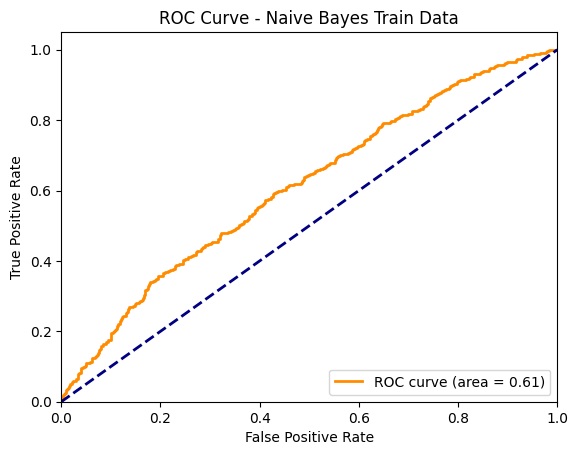

Gaussian Naive Bayes - Train dataset: 0.61


In [19]:
# 3 - Obtain ROC curve and AUC for train data

# Predict probabilities on the train set and calculate ROC AUC
train_df['predprob_nb'] = nb_model.predict_proba(X_train)[:, 1]
# Calculate ROC curve and AUC and return also de thresholds to be used in confusion matrix
fpr, tpr, thresholds = roc_curve(y_train, train_df['predprob_nb'])
roc_auc_train_nb = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc_train_nb, title='ROC Curve - Naive Bayes Train Data', model_name=NB_MODEL_NAME)

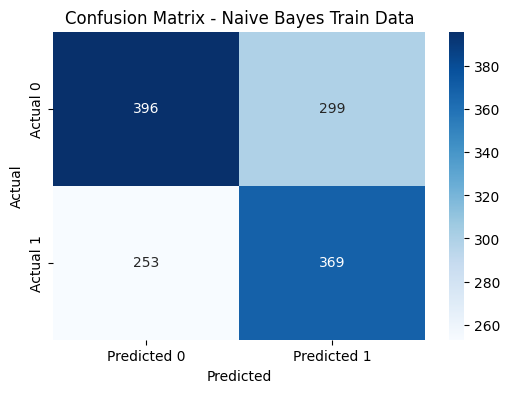

Classification report - Gaussian Naive Bayes - Train Dataset:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       695
           1       0.55      0.59      0.57       622

    accuracy                           0.58      1317
   macro avg       0.58      0.58      0.58      1317
weighted avg       0.58      0.58      0.58      1317



In [20]:
# 4 - Obtain Confusion Matrix and Classification Report for train data

# get the preducted classes based using the optimal threshold from ROC curve
# Use the threshold that maximizes TPR - FPR and returns the index for the threshold array
y_pred_nb_train = (train_df['predprob_nb'] >= thresholds[np.argmax(tpr - fpr)])

cm = confusion_matrix(y_train, y_pred_nb_train)
cr = classification_report(y_train, y_pred_nb_train)

plot_confusion_matrix(cm, cr, title='Confusion Matrix - Naive Bayes Train Data', model_name=NB_MODEL_NAME)

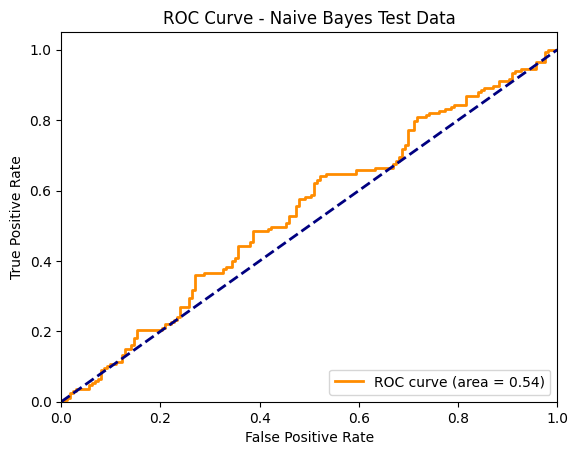

Gaussian Naive Bayes - Train dataset: 0.54


In [21]:
# 5 - Obtain ROC curve and AUC for test data

# Predict probabilities on the test set and calculate ROC AUC
test_df['predprob_nb'] = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, test_df['predprob_nb'])
roc_auc_test_nb = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc_test_nb, title='ROC Curve - Naive Bayes Test Data', model_name=NB_MODEL_NAME)

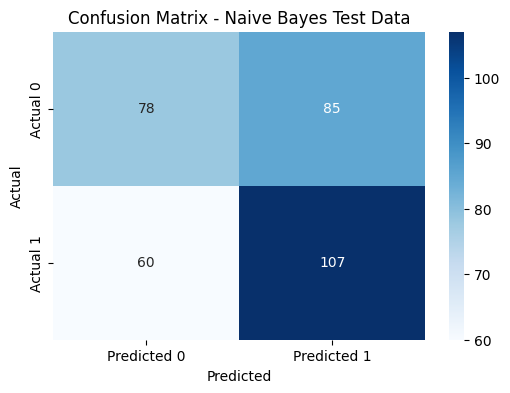

Classification report - Gaussian Naive Bayes - Test Dataset:
               precision    recall  f1-score   support

           0       0.57      0.48      0.52       163
           1       0.56      0.64      0.60       167

    accuracy                           0.56       330
   macro avg       0.56      0.56      0.56       330
weighted avg       0.56      0.56      0.56       330



In [22]:
# 4 - Obtain Confusion Matrix and Classification Report for test data
# get the preducted classes based using the optimal threshold from ROC curve
# Use the threshold that maximizes TPR - FPR and returns the index for the threshold array
y_pred_nb_test = (test_df['predprob_nb'] >= thresholds[np.argmax(tpr - fpr)])

cm = confusion_matrix(y_test, y_pred_nb_test)
cr = classification_report(y_test, y_pred_nb_test)

plot_confusion_matrix(cm, cr, title='Confusion Matrix - Naive Bayes Test Data', model_name=NB_MODEL_NAME)

In [23]:
# 7 - Same as above but using Decision Tree Method
# create a Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=123, # for reproducibility
    max_depth=5,  # prevent overfitting
    ccp_alpha=0 # complexity parameter for Minimal Cost-Complexity Pruning (suggested to be added by the help)
)

dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


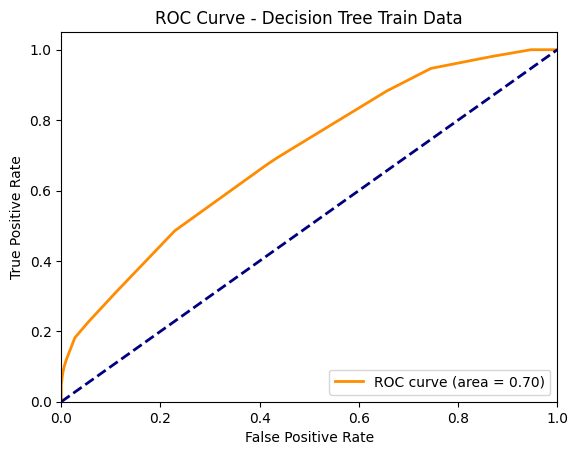

Decision Tree Classifier - Train dataset: 0.70


In [24]:
# Predict probabilities on the train set and calculate ROC AUC
train_df['predprob_dt'] = dt_model.predict_proba(X_train)[:, 1]  # Get probabilities for class 1
fpr_train_dt, tpr_train_dt, thresholds_dt = roc_curve(y_train, train_df['predprob_dt'])
roc_auc_train_dt = auc(fpr_train_dt, tpr_train_dt)

plot_roc_curve(fpr_train_dt, tpr_train_dt, roc_auc_train_dt, title='ROC Curve - Decision Tree Train Data', model_name=DT_MODEL_NAME)

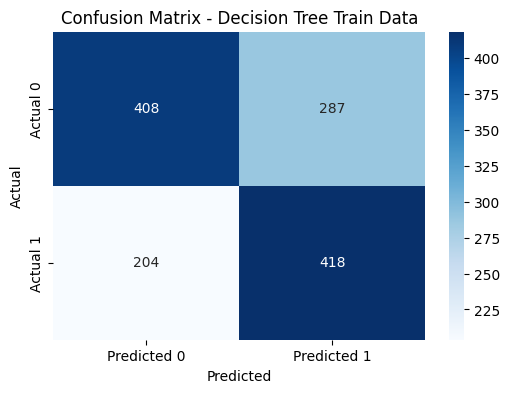

Classification report - Decision Tree Classifier - Train Dataset:
               precision    recall  f1-score   support

           0       0.67      0.59      0.62       695
           1       0.59      0.67      0.63       622

    accuracy                           0.63      1317
   macro avg       0.63      0.63      0.63      1317
weighted avg       0.63      0.63      0.63      1317



In [25]:
# Confusion Matrix and Classification Report for train data for Decision Tree
y_pred_dt_train = (train_df['predprob_dt'] >= thresholds_dt[np.argmax(tpr_train_dt - fpr_train_dt)])

cm_dt = confusion_matrix(y_train, y_pred_dt_train)
cr_dt = classification_report(y_train, y_pred_dt_train)

plot_confusion_matrix(cm_dt, cr_dt, title='Confusion Matrix - Decision Tree Train Data', model_name=DT_MODEL_NAME)

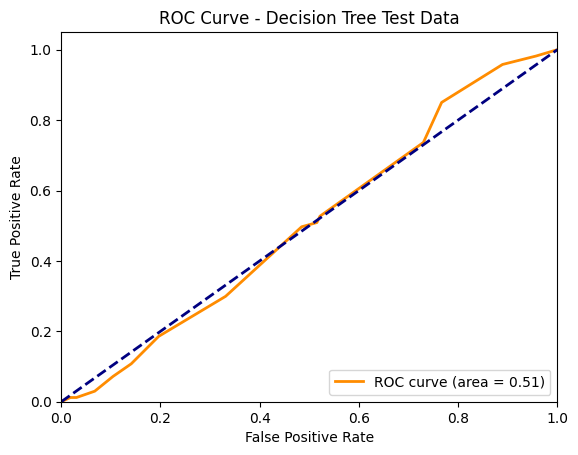

Decision Tree Classifier - Train dataset: 0.51


In [26]:
# Predict probabilities on the test set and calculate ROC AUC
test_df['predprob_dt'] = dt_model.predict_proba(X_test)[:, 1]
fpr_test_dt, tpr_test_dt, thresholds_test_dt = roc_curve(y_test, test_df['predprob_dt'])
roc_auc_test_dt = auc(fpr_test_dt, tpr_test_dt)

plot_roc_curve(fpr_test_dt, tpr_test_dt, roc_auc_test_dt, title='ROC Curve - Decision Tree Test Data', model_name=DT_MODEL_NAME)

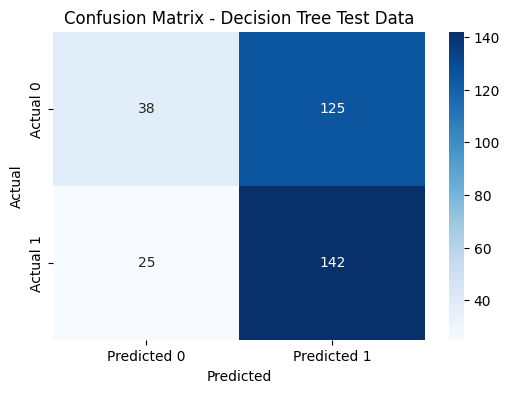

Classification report - Decision Tree Classifier - Test Dataset:
               precision    recall  f1-score   support

           0       0.60      0.23      0.34       163
           1       0.53      0.85      0.65       167

    accuracy                           0.55       330
   macro avg       0.57      0.54      0.50       330
weighted avg       0.57      0.55      0.50       330



In [27]:
# Confusion Matrix and Classification Report for test data for Decision Tree
y_pred_dt_test = (test_df['predprob_dt'] >= thresholds_test_dt[np.argmax(tpr_test_dt - fpr_test_dt)])

cm_dt_test = confusion_matrix(y_test, y_pred_dt_test)
cr_dt_test = classification_report(y_test, y_pred_dt_test)

plot_confusion_matrix(cm_dt_test, cr_dt_test, title='Confusion Matrix - Decision Tree Test Data', model_name=DT_MODEL_NAME)

In [ ]:
# 9 - Repeat the analysis for train and test datasets but using Random Forest
# Create Random forest model
# Random Forest

# this configuration generates overfitting and AUC 1 for train and 0.51 for test.
# rf_model = RandomForestClassifier(random_state=999, n_estimators=100, oob_score=True, max_features='sqrt')

# Adjusted parameters to reduce overfitting and improve test performance
rf_model = RandomForestClassifier(random_state=999, oob_score=True, max_features='sqrt', max_depth=2, n_estimators=50)

rf_model.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


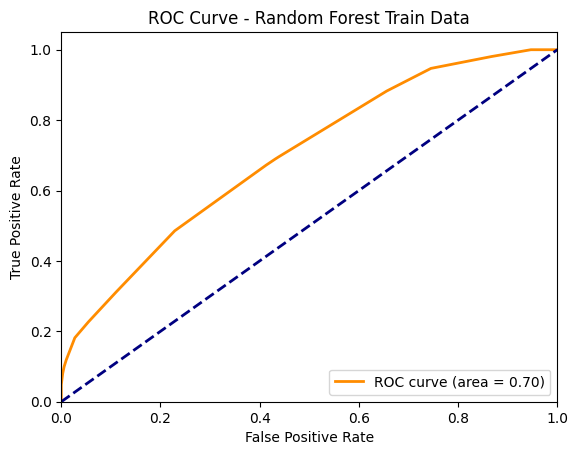

Random Forest Classifier - Train dataset: 0.70


In [29]:
# Predict probabilities on the train set and calculate ROC AUC
train_df['predprob_rf'] = rf_model.predict_proba(X_train)[:, 1]  # Get probabilities for class 1
fpr_train_rf, tpr_train_rf, thresholds_rf = roc_curve(y_train, train_df['predprob_dt'])
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

plot_roc_curve(fpr_train_rf, tpr_train_rf, roc_auc_train_rf, title='ROC Curve - Random Forest Train Data', model_name=RF_MODEL_NAME)

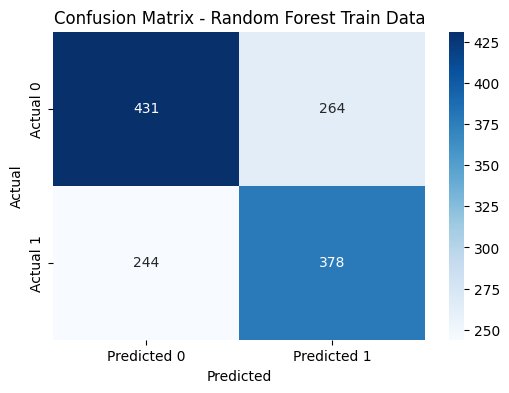

Classification report - Random Forest Classifier - Train Dataset:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       695
           1       0.59      0.61      0.60       622

    accuracy                           0.61      1317
   macro avg       0.61      0.61      0.61      1317
weighted avg       0.62      0.61      0.61      1317



In [30]:
# Confusion Matrix and Classification Report on train data for Random Forest
y_pred_rf_train = (train_df['predprob_rf'] >= thresholds_rf[np.argmax(tpr_train_rf - fpr_train_rf)])

cm_rf_train = confusion_matrix(y_train, y_pred_rf_train)
cr_rf_train = classification_report(y_train, y_pred_rf_train)

plot_confusion_matrix(cm_rf_train, cr_rf_train, title='Confusion Matrix - Random Forest Train Data', model_name=RF_MODEL_NAME)

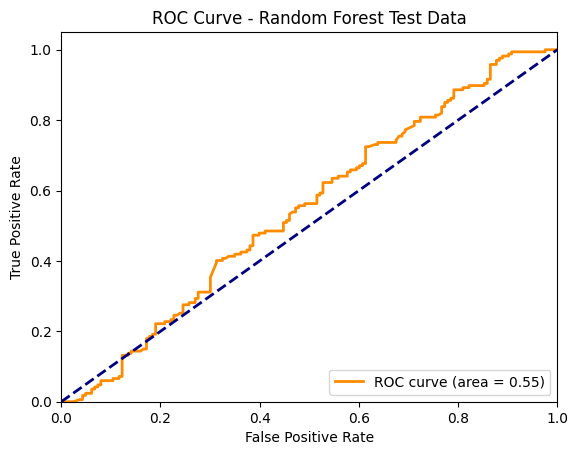

Random Forest Classifier - Train dataset: 0.55


In [31]:
# Predict probabilities on the test set and calculate ROC AUC using Random Forest
test_df['predprob_rf'] = rf_model.predict_proba(X_test)[:, 1]

fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, test_df['predprob_rf'])
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

plot_roc_curve(fpr_test_rf, tpr_test_rf, roc_auc_test_rf, title='ROC Curve - Random Forest Test Data', model_name=RF_MODEL_NAME)

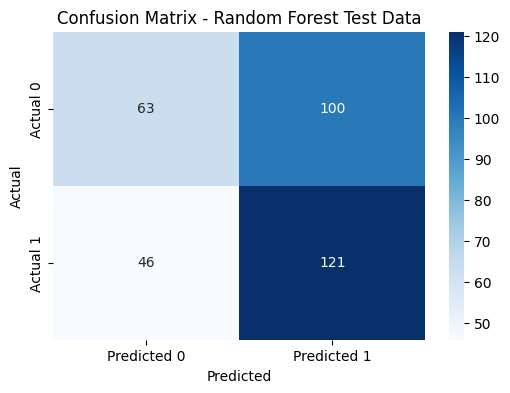

Classification report - Random Forest Classifier - Test Dataset:
               precision    recall  f1-score   support

           0       0.58      0.39      0.46       163
           1       0.55      0.72      0.62       167

    accuracy                           0.56       330
   macro avg       0.56      0.56      0.54       330
weighted avg       0.56      0.56      0.54       330



In [32]:
# Confusion Matrix and Classification Report on test data for Random Forest
y_pred_rf_test = (test_df['predprob_rf'] >= thresholds_test_rf[np.argmax(tpr_test_rf - fpr_test_rf)])

cm_rf_test = confusion_matrix(y_test, y_pred_rf_test)
cr_rf_test = classification_report(y_test, y_pred_rf_test)

plot_confusion_matrix(cm_rf_test, cr_rf_test, title='Confusion Matrix - Random Forest Test Data', model_name=RF_MODEL_NAME)

In [33]:
# Comparing AUC across models and datasets
models = [NB_MODEL_NAME, DT_MODEL_NAME, RF_MODEL_NAME]
train_aucs = [roc_auc_train_nb, roc_auc_train_dt, roc_auc_train_rf]

test_aucs = [roc_auc_test_nb , roc_auc_test_dt, roc_auc_test_rf]
auc_df = pd.DataFrame({
    'Model': models,
    'Train AUC': train_aucs,
    'Test AUC': test_aucs
})
print(auc_df)

# The 3 model perfomance are quite similar with Random Forest being slightly better on test data,
# Naive Bayes could predict as well as Random Forest given the data used.

                      Model  Train AUC  Test AUC
0      Gaussian Naive Bayes   0.612330  0.540024
1  Decision Tree Classifier   0.698167  0.506668
2  Random Forest Classifier   0.698167  0.546012
